In [259]:
import re
import numpy as np
import matplotlib.pyplot as plt

In [260]:
def extract_positions_from_log(file_path, field):
    positions = []

    # Regex to match the [POS] line and extract x, y, z as floats
    pattern = re.compile(rf"\[{field}\]\[([-\d.eE]+)[df],([-\d.eE]+)[df],([-\d.eE]+)[df]\]")
    pattern2 = re.compile(rf"\[{field}\]\[([-\d.eE]+)[df],([-\d.eE]+)[df]\]")

    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            match = pattern.search(line)
            if match:
                x, y, z = map(float, match.groups())
                positions.append((x, y, z))
            else:
                match = pattern2.search(line)
                if match:
                    x, y = map(float, match.groups())
                    positions.append((x, y))
    return np.array(positions)

In [261]:
pos_mc = extract_positions_from_log("../data/movements/mc.log", "xyz")[1:]
pos_mc_fail = extract_positions_from_log("../data/movements/mc_fail.log", "xyz")[1:]
pos_env = extract_positions_from_log("../data/movements/env.log", "xyz")[:-1]
pos_human = extract_positions_from_log("../data/movements/human.log", "xyz")[10:-17]

print(pos_mc.shape, pos_env.shape, pos_human.shape)
n = len(pos_mc)


(109, 3) (109, 3) (23, 3)


[ 0.5         0.5         0.5         0.41061898  0.2720784   0.2194552
  0.1638707   0.09515485  0.01448948 -0.0411258  -0.07394551 -0.11798243
 -0.17222703 -0.23576061 -0.3119677  -0.39970769 -0.54939897 -0.56188128
 -0.49889865 -0.45008722 -0.39797141 -0.33637502 -0.26615132 -0.21593252
 -0.18391819 -0.14061415 -0.08703648 -0.0241098   0.05154501  0.13456188
  0.27995512  0.34575041  0.39145314  0.41887162  0.46739657  0.5351284
  0.62237436  0.69407079  0.75161714  0.79628691  0.82276541  0.83916343
  0.81614565  0.91968119  1.27692204  1.46570711  1.66107564  1.86243514
  2.06924641  2.2437599   2.41673817  2.5599774   2.7081153   2.86071099
  2.98143912  3.07316778  3.05954085  3.01410605  2.95117692  2.82718487
  2.66960823  2.6065152   2.54140315  2.46401723  2.3754621   2.30257433
  2.24394387  2.21416428  2.21063898  2.19374618  2.16420275  2.15148922
  2.22760663  2.49608961  2.62958425  2.76523537  2.90284888  3.01390618
  3.13275853  3.25870437  3.36561767  3.44477484  3.4

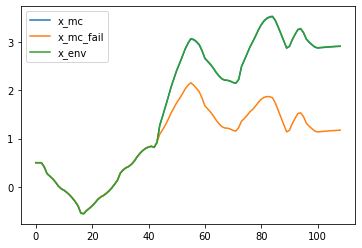

In [262]:
plt.plot(np.arange(n), pos_mc[:, 0], label="x_mc")
plt.plot(np.arange(n), pos_mc_fail[:, 0], label="x_mc_fail")
plt.plot(np.arange(n), pos_env[:, 0], label="x_env")
#plt.plot(np.arange(n), pos_human[:, 0], label="x_human")

print(pos_env[:, 0])
print(pos_mc[:, 0])
#print(-pos_human[:, 0] + 14.)


# plt.plot(np.arange(n), pos_mc[:, 2], label="z_mc")
# plt.plot(np.arange(n), pos_env[:, 2], label="z_env")
plt.legend()

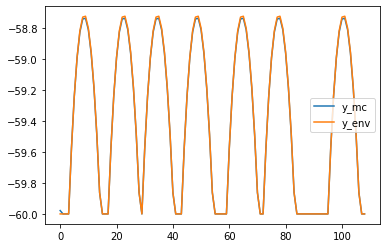

In [263]:
plt.plot(np.arange(n), pos_mc[:, 1], label="y_mc")

plt.plot(np.arange(n), pos_env[:, 1], label="y_env")
plt.legend()

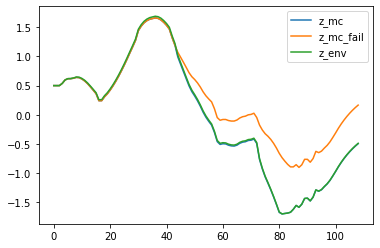

In [264]:
plt.plot(np.arange(n), pos_mc[:, 2], label="z_mc")
plt.plot(np.arange(n), pos_mc_fail[:, 2], label="z_mc_fail")

plt.plot(np.arange(n), pos_env[:, 2], label="z_env")
plt.legend()

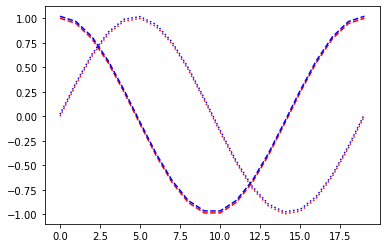

In [196]:
x = np.linspace(0, np.pi * 2, 20)

plt.plot(range(20), np.cos(x), color="r", linestyle="--")
plt.plot(range(20), np.sin(x), color="r", linestyle=":")

plt.plot(range(20), -np.sin(x - np.pi/2)+0.02, color="b", linestyle="--")
plt.plot(range(20), np.cos(x - np.pi/2)+0.02, color="b", linestyle=":")

In [24]:
# simulate sprint jumping 


g_ground = 0.0784
g_up = 0.0828
g_down = 0.075

jump_strength = 0.415 + g_up

sprint_speed = 0.28

base_jump_boost = 0.24
jump_boost_rel = 0.32
air_fric_rel = 0.14
jump_boost = 0.2
air_fric = 0.3
air_fric_ground = 1.5
air_fric_ground_rel = 5

sprint_accel = 0.0971 * 1.3
walk_air_accel = 0.0197
sprint_air_accel = walk_air_accel * 1.3

sim_y = y[0] + 60
sim_vy = vvy[0]
sim_vx = vh[0]
sim_vvx = vvh[0]

ys = [sim_y]
vys = [sim_vy]
vxs = [sim_vx]
vvxs = [sim_vvx]

for t in range(1, len(vh)):
    
    if sim_y > 0:
        sim_vx -= air_fric_rel * (np.abs(sim_vx)) * 0.088
        sim_vvx -= air_fric * (np.abs(sim_vvx)) * 0.3
    else:
        sim_vx -= air_fric_ground_rel * (np.abs(sim_vx)) * 0.088
        sim_vvx -= air_fric_ground * (np.abs(sim_vvx)) * 0.3
    
    
    if vh[t] > 0:
        sim_vvx += sprint_accel

    if sim_vy > 0:
        g = g_up
    else:
        g = g_down
        
        
    sim_vy -= g
    
    sim_y = np.maximum(sim_y + sim_vy, 0)
    
    if t > 1 and t + 1 < len(vvy) and  vvy[t+1] > 0.4:   
        sim_vx += jump_boost_rel
    
    if sim_y == 0 and vvy[t] < 0.4:
        sim_vy = -g_down
        
    

    
    ys.append(sim_y)
    vys.append(sim_vy)
    
    vxs.append(sim_vx)
    vvxs.append(sim_vvx)
    

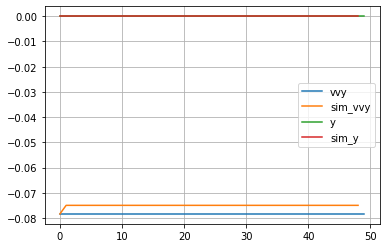

In [25]:
plt.plot(np.arange(len(vvy)), vvy, label="vvy")
plt.plot(np.arange(len(vys)), vys, label="sim_vvy")
plt.plot(np.arange(len(y)), y+60, label="y")
plt.plot(np.arange(len(ys)), ys, label="sim_y")
#plt.hlines(-g_ground, 0, 37)
plt.grid()

plt.legend()


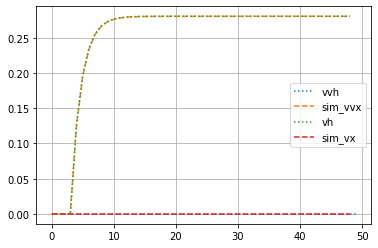

In [26]:
plt.plot(np.arange(len(vvh)), vvh, label="vvh", linestyle=":")
plt.plot(np.arange(len(vvxs)), vvxs, label="sim_vvx", linestyle="--")
plt.plot(np.arange(len(vh)), vh, label="vh", linestyle=":")
plt.plot(np.arange(len(vxs)), vxs, label="sim_vx", linestyle="--")

plt.grid()

plt.legend()